In [6]:
import pickle
import pandas as pd

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [19]:
import importlib ##can remove
import boxplot_common as bc
import graphing_config as gc
importlib.reload(bc) ##can remove
importlib.reload(gc) ##can remove

<module 'graphing_config' from '/gpfs/gibbs/pi/reilly/VariantEffects/scripts/noon_scripts/5.graphs/phylop_emvar_box_plot/graphing_config.py'>

In [4]:
#loading data from the proprocessing step...
data=None
with open("out.pkl","rb") as file:
    data=pickle.load(file)

In [20]:
df=bc.expand_quartiles(pd.DataFrame(data))

In [27]:
df

,min,max,n,mean,stdev,region,emvar,25%,50%,75%,combined
0,-20.0,8.903,2070231,0.528798,2.288169,is_in_PLS,emVar_K562,-0.495,0.124,0.879,is_in_PLS_emVar_K562
1,-20.0,8.903,2070231,0.528798,2.288169,is_in_PLS,emVar_SKNSH,-0.495,0.124,0.879,is_in_PLS_emVar_SKNSH
2,-20.0,8.903,2070231,0.528798,2.288169,is_in_PLS,emVar_HepG2,-0.495,0.124,0.879,is_in_PLS_emVar_HepG2
3,-20.0,8.903,2070231,0.528798,2.288169,is_in_PLS,ALL,-0.495,0.124,0.879,is_in_PLS_ALL
4,-20.0,8.903,1690279,0.448025,2.222331,is_in_PLS,non_emvar,-0.534,0.107,0.811,is_in_PLS_non_emvar
5,-20.0,8.903,81004277,0.086230,1.457246,is_in_dELS,emVar_K562,-0.485,0.048,0.460,is_in_dELS_emVar_K562
6,-20.0,8.903,81004277,0.086230,1.457246,is_in_dELS,emVar_SKNSH,-0.485,0.048,0.460,is_in_dELS_emVar_SKNSH
7,-20.0,8.903,81004277,0.086230,1.457246,is_in_dELS,emVar_HepG2,-0.485,0.048,0.460,is_in_dELS_emVar_HepG2
8,-20.0,8.903,81004277,0.086230,1.457246,is_in_dELS,ALL,-0.485,0.048,0.460,is_in_dELS_ALL
9,-20.0,8.903,71407443,0.095999,1.461761,is_in_dELS,non_emvar,-0.480,0.049,0.460,is_in_dELS_non_emvar


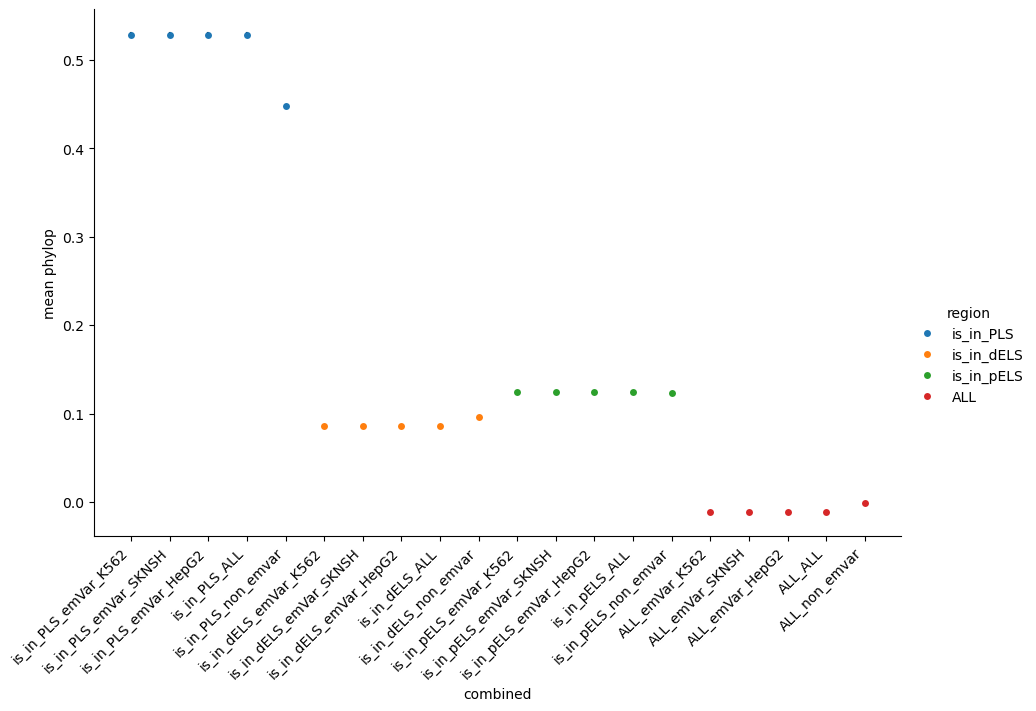

In [47]:
def plot_mean(df,x_tick_vars,sem=True):
    df['combined'] = df.apply(lambda row: '_'.join(row[col] for col in x_tick_vars), axis=1)
    plot = sns.catplot(x='combined', y='mean', data=df, kind='strip',height=6, aspect=1.5,hue='region')
    plt.xticks(rotation=45,ha="right")
    
    # Extract the list of x-tick labels as strings
    xtick_labels = [label.get_text() for label in plot.ax.get_xticklabels()]
    
    for i in range(df.shape[0]):
        # Find the index of the current 'combined' in the list of x-tick labels
        combined_index = xtick_labels.index(df.iloc[i]['combined'])

        # Retrieve the x-coordinate for the current 'pleio_region' from the list of x-tick positions
        x = plot.ax.get_xticks()[combined_index]
        
        y = df.iloc[i]['mean']
        
        x_coords=[x,x]
        
        y_coords=[]
        
        if sem:
            y_coords=[df.iloc[i]['mean']-df.iloc[i]['stdev']/math.sqrt(df.iloc[i]['n']),df.iloc[i]['mean']+df.iloc[i]['stdev']/math.sqrt(df.iloc[i]['n'])]
        else:
            #otherwise just do stdev
            y_coords=[df.iloc[i]['mean']-df.iloc[i]['stdev'],df.iloc[i]['mean']+df.iloc[i]['stdev']]
        
        
        plt.plot(x_coords,y_coords, marker = ',',color="black")
        
        #plt.text(x, y+0.01, "test",  ha='left')
        
        
        
    plt.ylabel("mean phylop")

plot_mean(df,x_tick_vars=["region","emvar"])